# juypter notebook demonstrating image options

* Juypter notebook that demonstrates the various image options available in PdbChemicalComponentsRDKit

In [1]:
# hack to sort out python path from 
# https://stackoverflow.com/questions/39299838/how-do-i-import-module-in-jupyter-notebook-directory-into-notebooks-in-lower-dir
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
# first import our code and a method so we can display the SVG strings in the notebook
from pdb_chemical_components_rdkit import PdbChemicalComponentsRDKit
from utilities import cif_filename
from IPython.display import SVG, display

Sample molecules from the `data/pdb_ccd_mmcif_test_files` directory - from small to large to very large
* DMS dimethyl sulfoxide (4 non-hydrogen atoms)
* GOL glycerol (6)
* GLC glucose (12)
* IBP ibuprofen (15)
* 099 (27)
* ATP (30)
* NAD (44)
* BCD beta-cyclodextrin (77)
* CDL cardiolipin  (99)

In [3]:
codes = ('DMS', 'GOL', 'GLC', 'IBP', '099', 'ATP', 'NAD', 'BCD', 'CDL')

create a dictionary with a `PdbChemicalComponentsRDKit` object for each code:

In [4]:
ccds = {}
for code in codes:
    ccds[code] = PdbChemicalComponentsRDKit(file_name=cif_filename(code))

## Demonstrate default images 
* defaults with atom labels, wedges, without hydrogen atoms

DMS


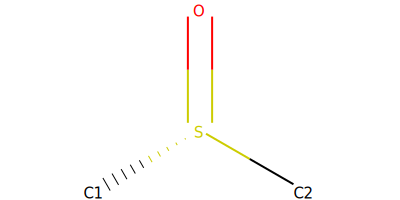

GOL


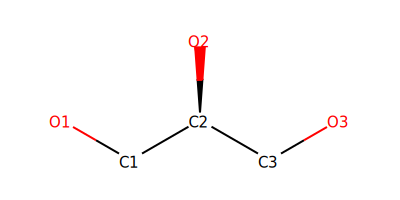

GLC


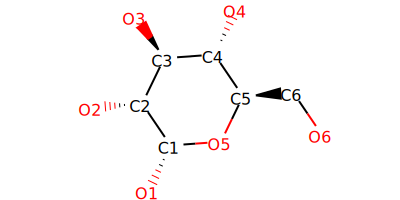

IBP


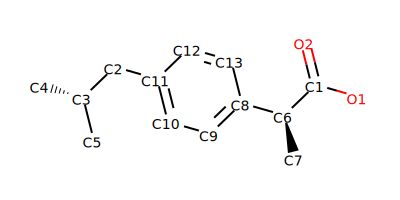

099


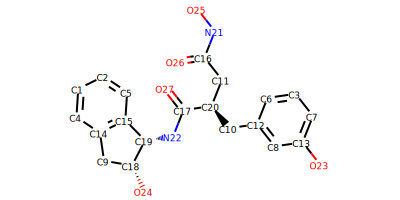

ATP


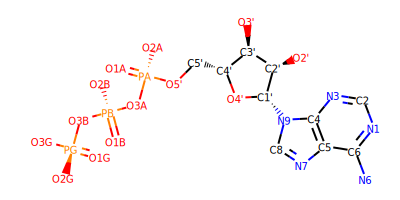

NAD


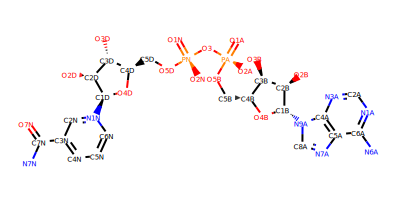

BCD


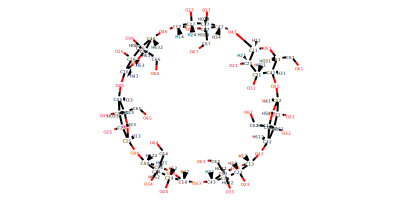

CDL


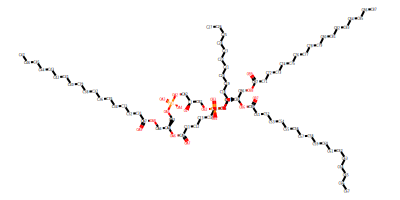

In [5]:
for code in codes:
    print(code)
    svg_string  = ccds[code].image_file_or_string()
    display(SVG(svg_string))

## Matt Conroy's initial comments 2017-06-16
* looks nice atom label are reasonably clear
* does not like wedge's on phosphate groups
* try bigger examples _so add BCD and CDL_

## Oliver's comments 2017-06-16
* not that happy with BCD and CDL diagrams is the use of method `AllChem.GenerateDepictionMatching3DStructure` producing a good set of 2D coords?

## Demonstrate atom_labels=False  images

DMS


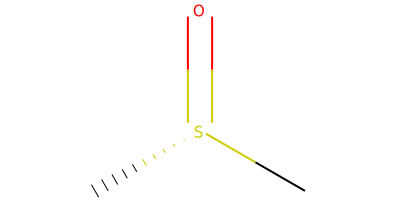

GOL


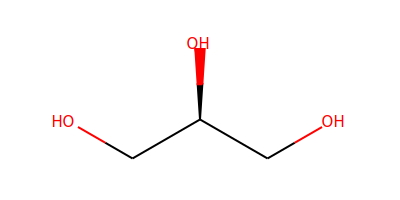

GLC


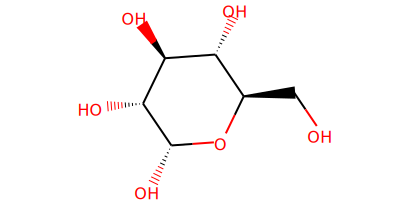

IBP


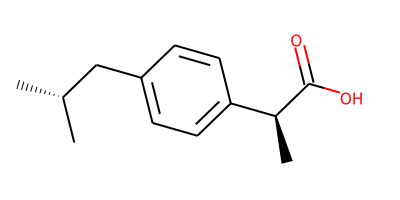

099


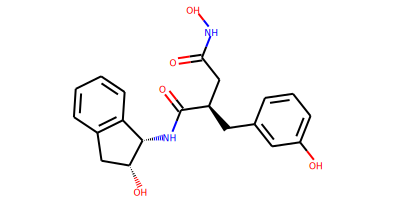

ATP


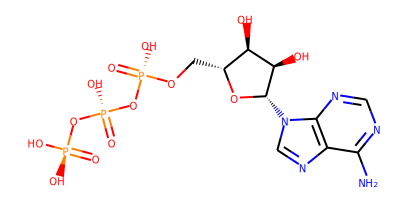

NAD


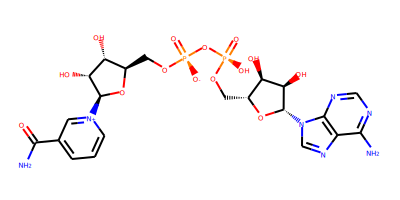

BCD


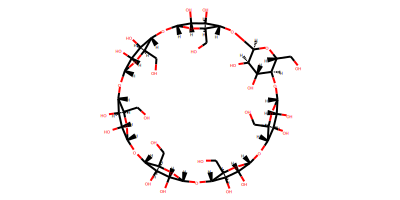

CDL


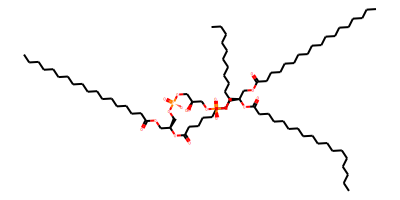

In [6]:
for code in codes:
    print(code)
    svg_string  = ccds[code].image_file_or_string(atom_labels=False)
    display(SVG(svg_string))

# Demonstrate hydrogen=True atom_labels=False

DMS


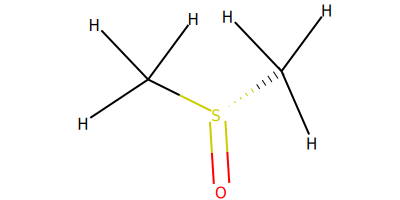

GOL


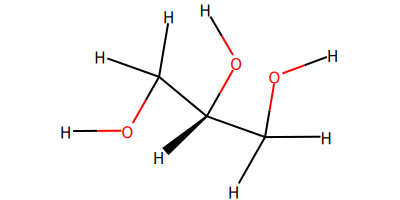

GLC


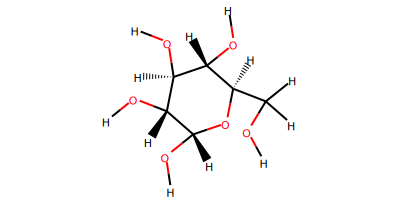

IBP


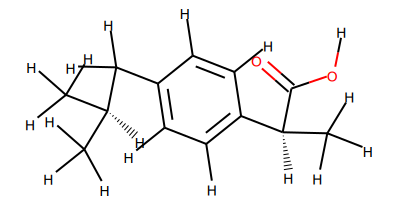

099


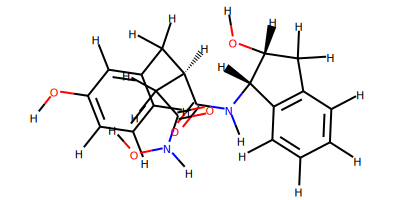

ATP


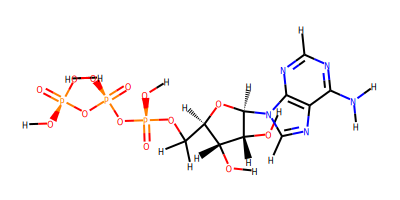

NAD


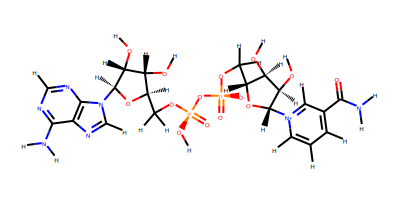

BCD


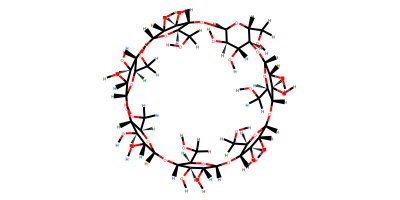

CDL


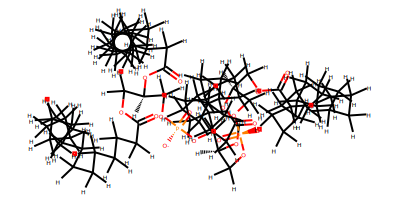

In [7]:
for code in codes:
    print(code)
    svg_string  = ccds[code].image_file_or_string(hydrogen=True, atom_labels=False)
    display(SVG(svg_string))

hydrogen=True results are mixed. 099 is very poor *worth trying other options*

# Demonstrate hydrogen=True atom_labels=True

DMS


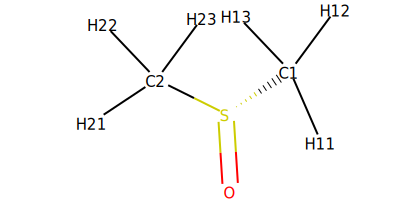

GOL


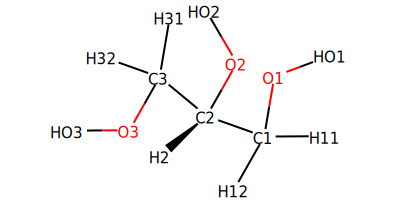

GLC


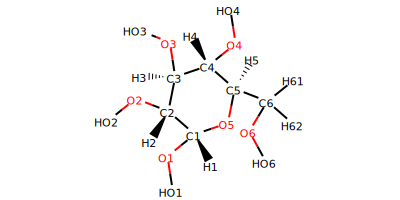

IBP


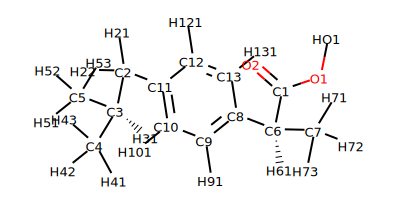

099


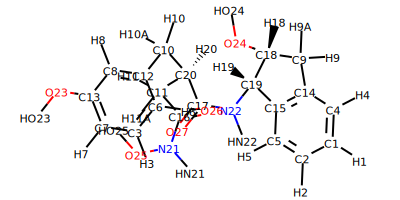

ATP


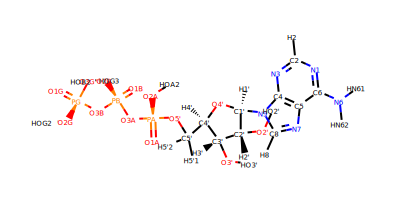

NAD


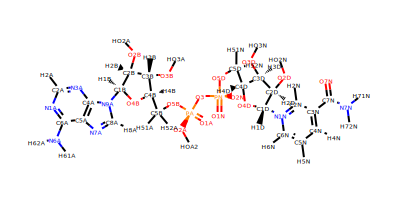

BCD


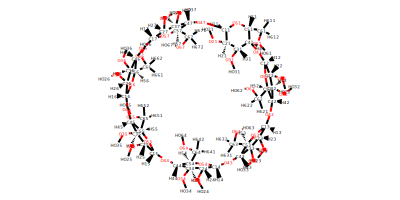

CDL


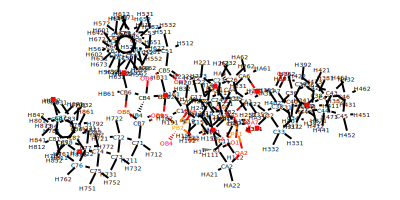

In [8]:
for code in codes:
    print(code)
    svg_string  = ccds[code].image_file_or_string(hydrogen=True, atom_labels=True)
    display(SVG(svg_string))

same problem with 099 as before. Not that bad.

# Can a png file be written?
also test pixels_x and pixels_y

In [9]:
test_png_file_name = 'try_png_ATP.png'
ccds['ATP'].image_file_or_string(atom_labels=False, file_name=test_png_file_name, pixels_x=800, pixels_y=400)
assert os.path.isfile(test_png_file_name)

appears to work! Image file is produced (and its 800*400). *BUT it is a svg file*
So update docstring to make clear that currently method produces svg only.

See https://gitlab.com/pdbe/ccd_utils/issues/6#note_37029581 for follow up to issues identified.